# Machine Learning in Python - Project 1

Due Friday, March 6th by 5 pm.

## 1. Setup

### 1.1 Libraries

In [1]:
# Add any additional libraries or submodules below

# Display plots inline
%matplotlib inline

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn modules
import sklearn

In [2]:
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### 1.2 Data

In [3]:
sales = pd.read_csv("sales.csv")
sales_test = pd.read_csv("sales_test.csv")

## 2. Exploratory Data Analysis and Preprocessing

*Include a discussion of the data with a particular emphasis on the features of the data that are relevant for the subsequent modeling. Including visualizations of the data is strongly encouraged - all code and plots must also be described in the write up.*

*In this section you should also implement and describe any preprocessing / transformations of the features. Hint - you should not be modeling this data without transforming some of the features, e.g. modeling sale price directly is not a good idea.*

In [4]:
# First, check the data looks like.
sales.head()

,sale_price,year_sold,year_built,lot_area,basement_area,living_area,full_bath,half_bath,bedroom,garage_cars,garage_area,ac,zoning,neighborhood,quality,condition
0,244000,2010,1968,11160,2110,2110,2,1,3,2,522,Y,Residential_Low_Density,nb_07,good,average
1,189900,2010,1997,13830,928,1629,2,1,3,2,482,Y,Residential_Low_Density,nb_22,average,average
2,191500,2010,1992,5005,1280,1280,2,0,2,2,506,Y,Residential_Low_Density,nb_10,good,average
3,236500,2010,1995,5389,1595,1616,2,0,2,2,608,Y,Residential_Low_Density,nb_10,good,average
4,189000,2010,1999,7500,994,1804,2,1,3,2,442,Y,Residential_Low_Density,nb_22,good,average


In [5]:
# check the 'nan' values.
sales.isnull().values.any()

False

There is no missing value in sales data.

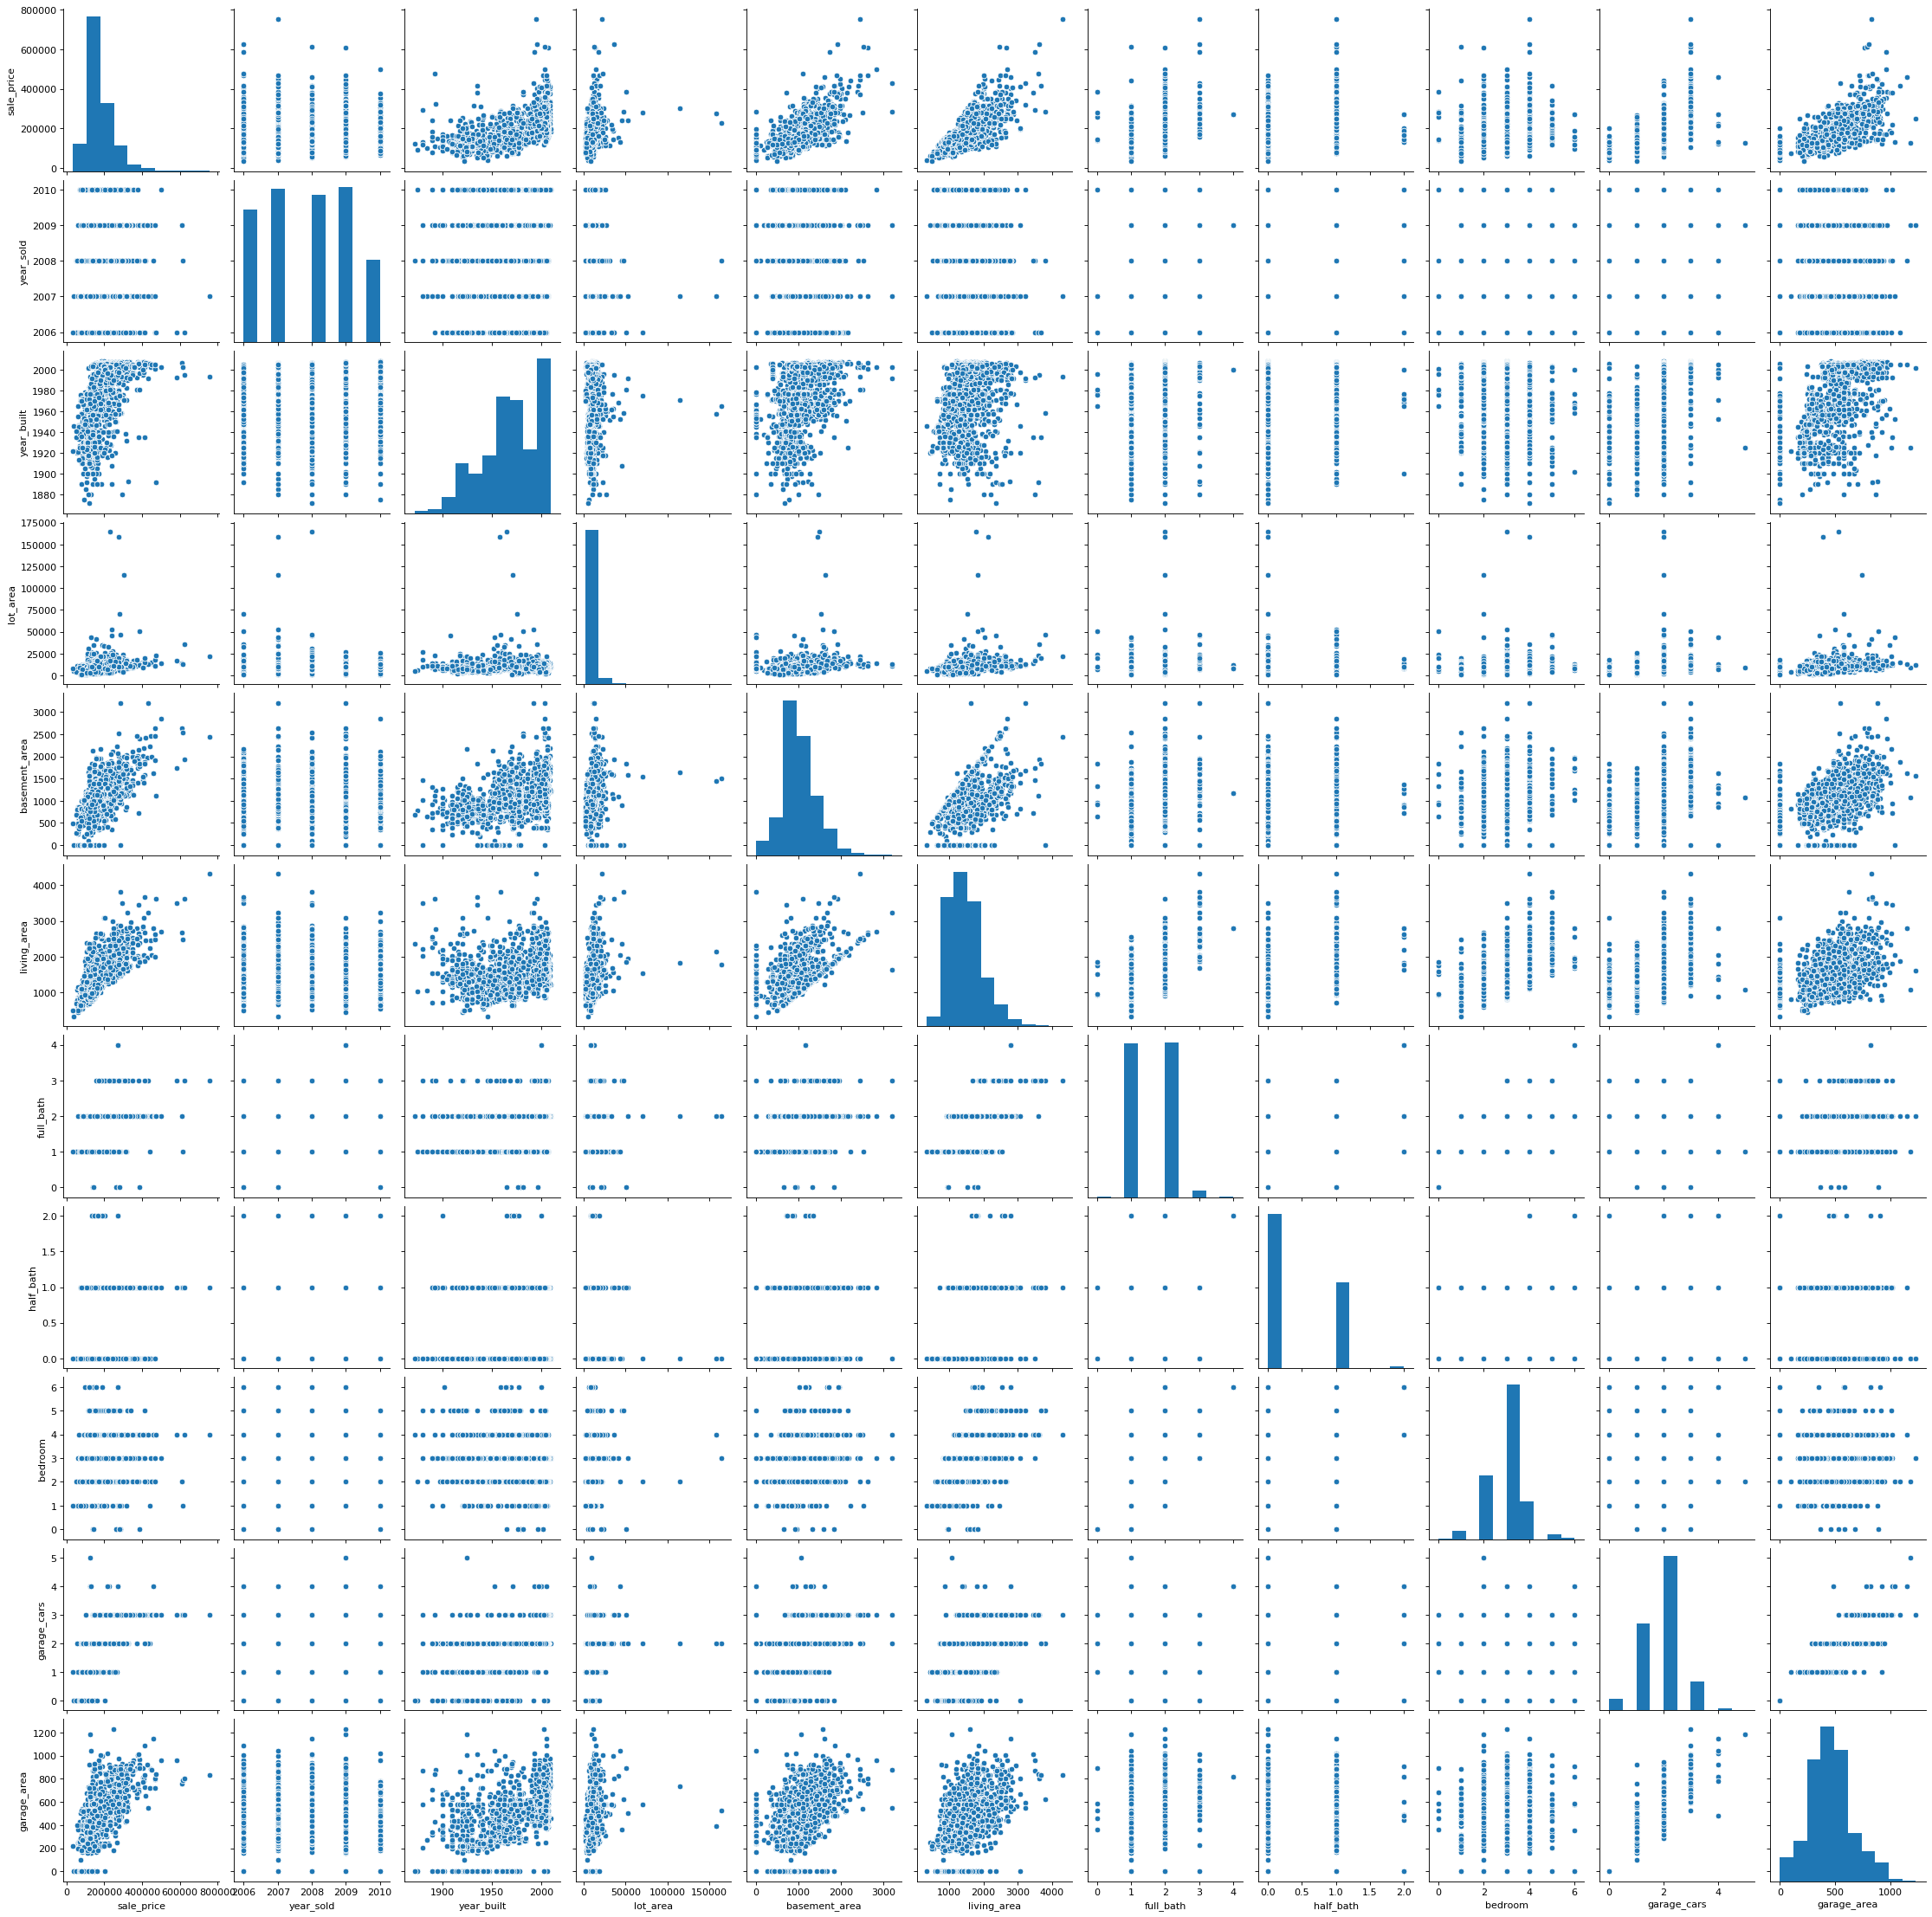

In [6]:
sns.pairplot(data = sales)

Above the plot we could find that year_sold, full_bath, half_bath, bedroom and garage_cars are categorical varibles. `living_area` seems to have significant relationship with `sale_price`. 

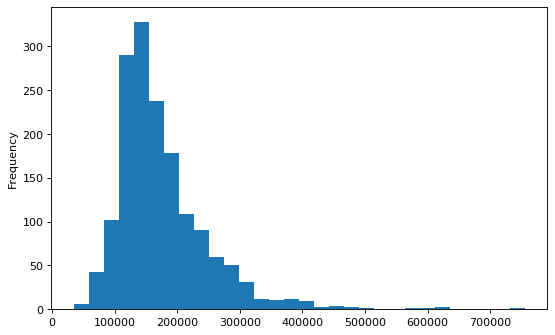

In [7]:
# Let's plot the 'sale_price' histogram from pair plot to see the skewness.
sales["sale_price"].plot.hist(bins=30)

Most of the values of `sale_price` is located in the left side. i.e. right-skewed.

In [8]:
sales['sale_price'].describe()

count      1584.000000
mean     174600.288510
std       72033.178387
min       35000.000000
25%      129000.000000
50%      156225.000000
75%      203033.750000
max      755000.000000
Name: sale_price, dtype: float64

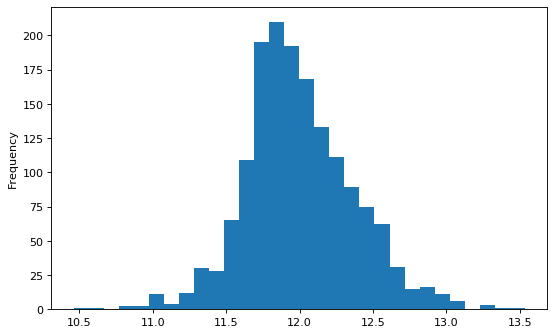

In [9]:
sales['lsale_price'] = np.log(sales['sale_price'])
sales["lsale_price"].plot.hist(bins=30)

When we take log into `sale_price` we could get that more looks like symmetric histogram. It looks like normal distribution.

Check the relations with `sale_price`. If it has no such a great relation between each column and if we can make it more linear relationship by dropping some points, drop unrelated points.

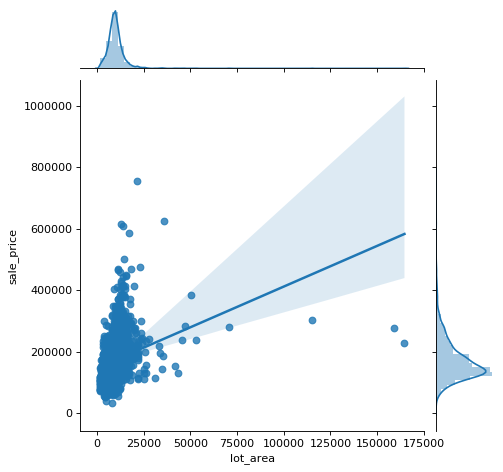

In [10]:
sns.jointplot(x=sales['lot_area'], y=sales['sale_price'], kind='reg')

This graph shows that it has no linear relation with `sale_price` and `lot_area`.


So we need to handle this data. I have tried to drop the data to fit the linear model. If the data is far away from the guildline(sky blue region), I drop the data.

In [11]:
sales = sales.drop(sales[(sales['lot_area']>75000) 
                         & (sales['sale_price']<400000)].index).reset_index(drop=True)
sales = sales.drop(sales[(sales['lot_area']<41000) 
                         & (sales['sale_price']>350000)].index).reset_index(drop=True)
sales = sales.drop(sales[(sales['lot_area']>30000) 
                         & (sales['sale_price']<200000)].index).reset_index(drop=True)

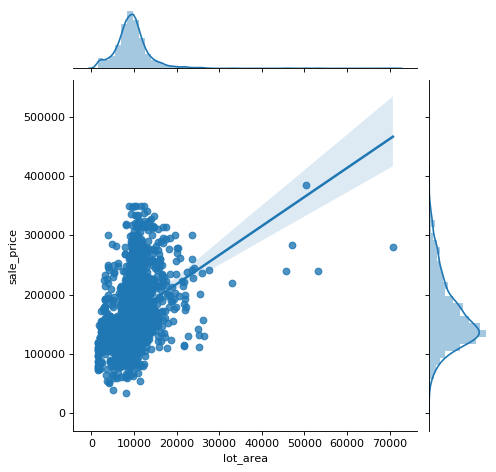

In [12]:
sns.jointplot(x=sales['lot_area'], y=sales['sale_price'], kind='reg')

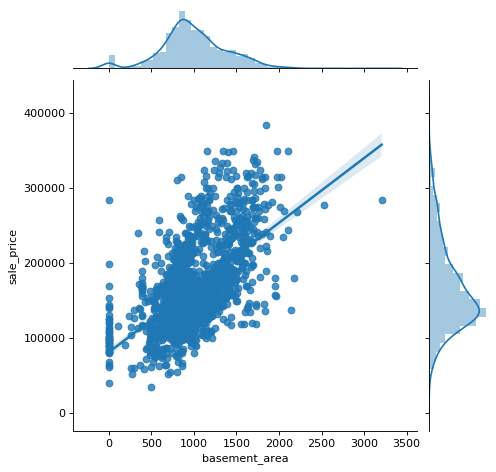

In [13]:
# similar method with 'lot_area'
sns.jointplot(x=sales['basement_area'], y=sales['sale_price'], kind='reg')

In [14]:
sales = sales.drop(sales[(sales['basement_area']>1500) 
                         & (sales['sale_price']>550000)].index).reset_index(drop=True)
sales = sales.drop(sales[(sales['basement_area']<100) 
                         & (sales['sale_price']>150000)].index).reset_index(drop=True)

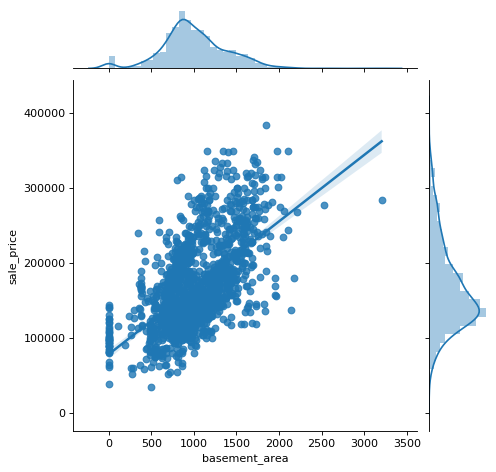

In [15]:
sns.jointplot(x=sales['basement_area'], y=sales['sale_price'], kind='reg')

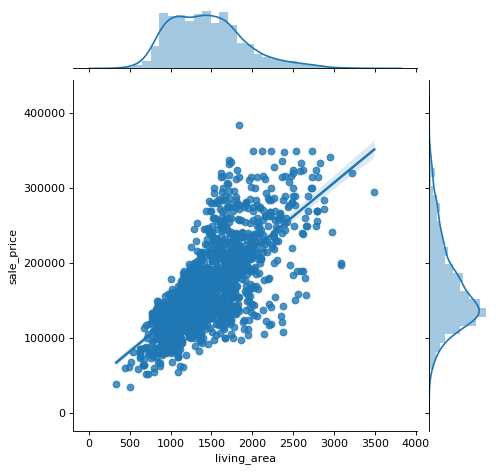

In [16]:
# similar method with 'lot_area'
sns.jointplot(x=sales['living_area'], y=sales['sale_price'], kind='reg')

In [17]:
sales = sales.drop(sales[(sales['living_area']>2000) 
                         & (sales['sale_price']>500000)].index).reset_index(drop=True)

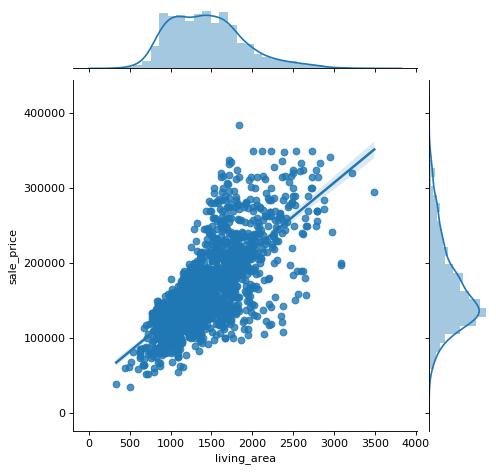

In [18]:
sns.jointplot(x=sales['living_area'], y=sales['sale_price'], kind='reg')

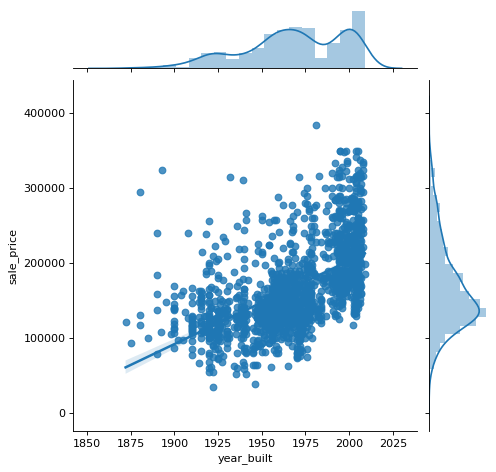

In [19]:
# similar method with 'lot_area'
sns.jointplot(x=sales['year_built'], y=sales['sale_price'], kind='reg')

In [20]:
sales = sales.drop(sales[(sales['year_built']<1950) 
                         & (sales['sale_price']>290000)].index).reset_index(drop=True)
sales = sales.drop(sales[(sales['year_built']<1900) 
                         & (sales['sale_price']>150000)].index).reset_index(drop=True)
sales = sales.drop(sales[(sales['sale_price']>350000)].index).reset_index(drop=True)

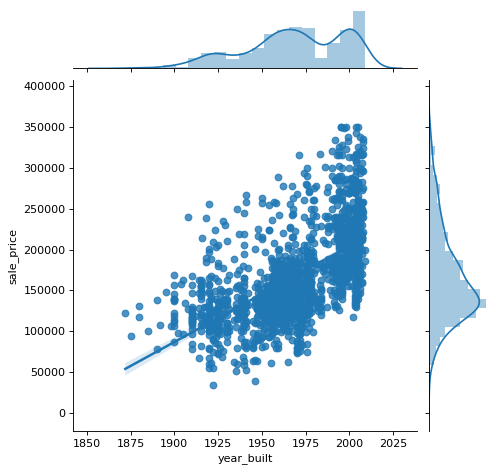

In [21]:
sns.jointplot(x=sales['year_built'], y=sales['sale_price'], kind='reg')

Next step is checking the relationship between 'categorical variables' and `sale_price`.

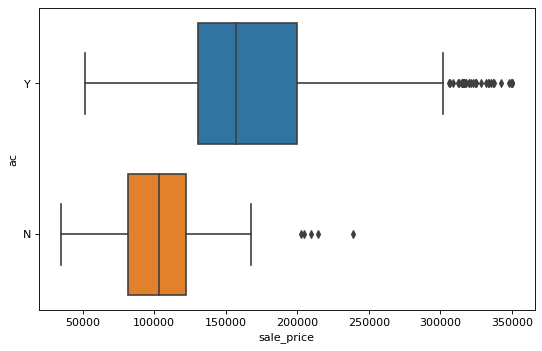

In [22]:
sns.boxplot(y=sales['ac'], x=sales['sale_price'])

# we can see that when they have air conditioning the mean of sale_price would be more higher.

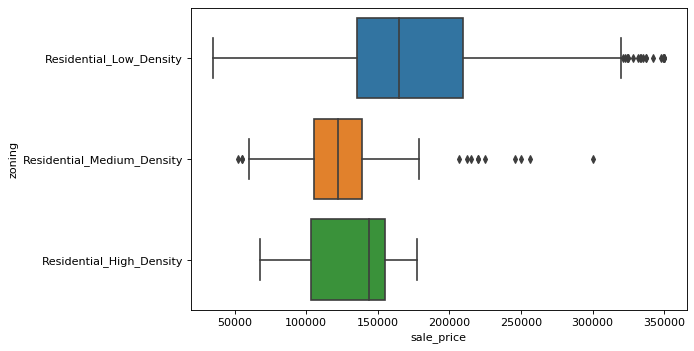

In [23]:
sns.boxplot(y=sales['zoning'], x=sales['sale_price'])

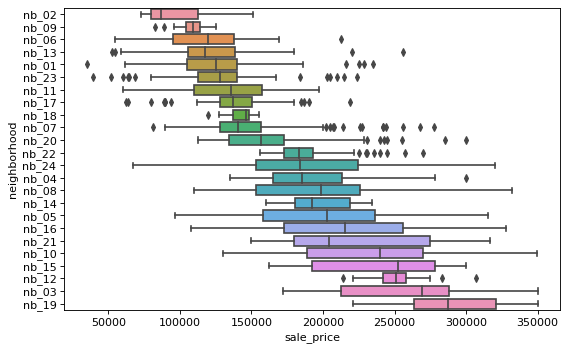

In [24]:
# Combine the neighborhood into 4 neighborhood group by similar mean values.
# we need to use 'groupby' and sort by mean.

order_neighborhood = sales.groupby('neighborhood')['sale_price'].mean().sort_values().index
sns.boxplot(y=sales['neighborhood'], x=sales['sale_price'], order = order_neighborhood)

In [25]:
# change the data into new index nb_1 to nb_4
sales['neighborhood'] = sales['neighborhood'].replace(['nb_02','nb_09','nb_06','nb_13','nb_23','nb_01'], 'nb_1')
sales['neighborhood'] = sales['neighborhood'].replace(['nb_11','nb_17','nb_18','nb_07','nb_20','nb_22'], 'nb_2')
sales['neighborhood'] = sales['neighborhood'].replace(['nb_24','nb_04','nb_08','nb_14','nb_05','nb_16'], 'nb_3')
sales['neighborhood'] = sales['neighborhood'].replace(['nb_21','nb_15','nb_10','nb_12','nb_03','nb_19'], 'nb_4')

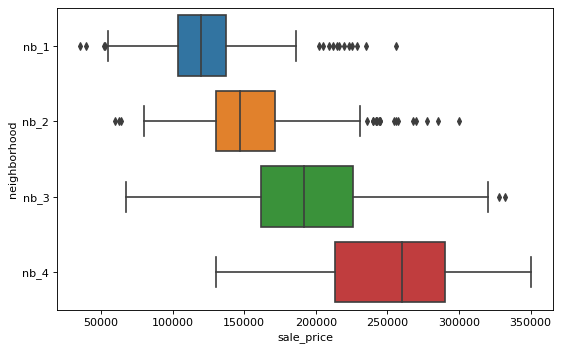

In [26]:
sns.boxplot(y=sales['neighborhood'], x=sales['sale_price'],order = ['nb_1','nb_2','nb_3','nb_4'])

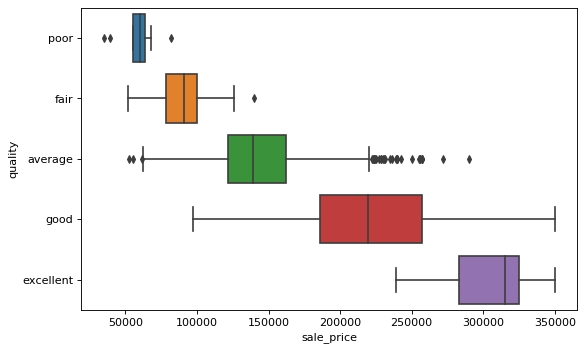

In [27]:
# see the relation between quality and sale_price.
sns.boxplot(y=sales['quality'], x=sales['sale_price'], order = ['poor','fair','average','good','excellent'])

From above plot, we can combine those into 3 parts due to one-hot coding to reduce the columns.

In [28]:
# Combine it into 3 parts
# Replace 'good' to 'average' and 'fair' to 'poor'
sales['quality'] = sales['quality'].replace('good', 'average')
sales['quality'] = sales['quality'].replace('fair', 'poor')

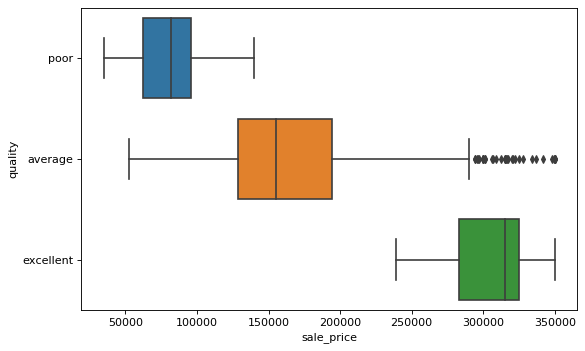

In [29]:
sns.boxplot(y=sales['quality'], x=sales['sale_price'], order=['poor','average','excellent'])

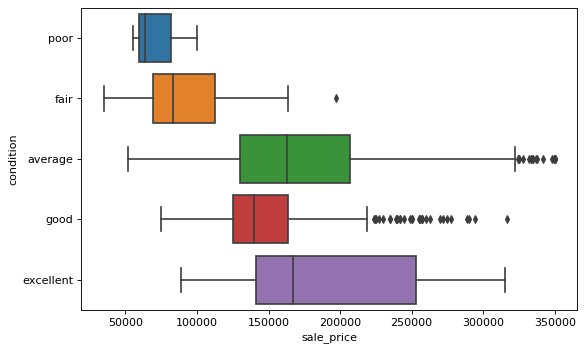

In [30]:
# similarly we can also handle the 'condition' variable.
sns.boxplot(y=sales['condition'], x=sales['sale_price'], order = ['poor','fair','average','good','excellent'])

In [31]:
sales['condition'] = sales['condition'].replace('fair', 'poor')
sales['condition'] = sales['condition'].replace('good', 'average')

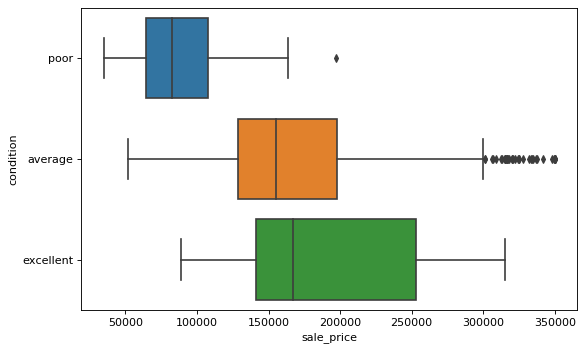

In [32]:
sns.boxplot(y=sales['condition'], x=sales['sale_price'], order = ['poor','average','excellent'])

In [33]:
# Add new column called 'year_age' subtracting from year_sold to year_built.

sales['year_age'] = sales.apply(lambda row: row.year_sold - row.year_built, axis = 1) 

# https://www.geeksforgeeks.org/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/

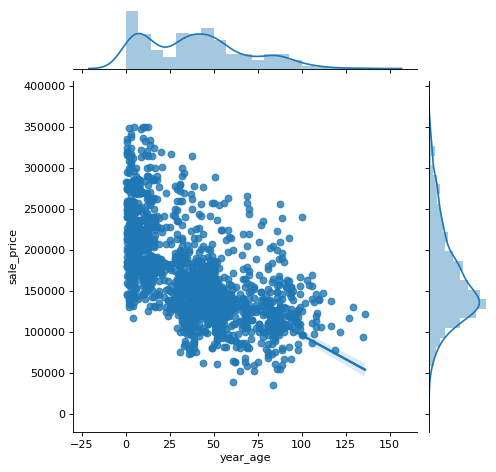

In [34]:
# Checking the plot about new column 'year_age'.
sns.jointplot(x=sales['year_age'], y=sales['sale_price'], kind='reg')

In [35]:
# Drop the unrelated points.
sales = sales.drop(sales[(sales['year_age']>50) 
                         & (sales['sale_price']>200000)].index).reset_index(drop=True)
sales = sales.drop(sales[(sales['sale_price']>300000)].index).reset_index(drop=True)

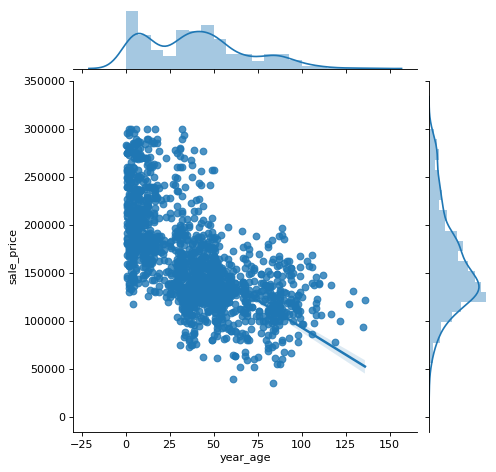

In [36]:
sns.jointplot(x=sales['year_age'], y=sales['sale_price'], kind='reg')

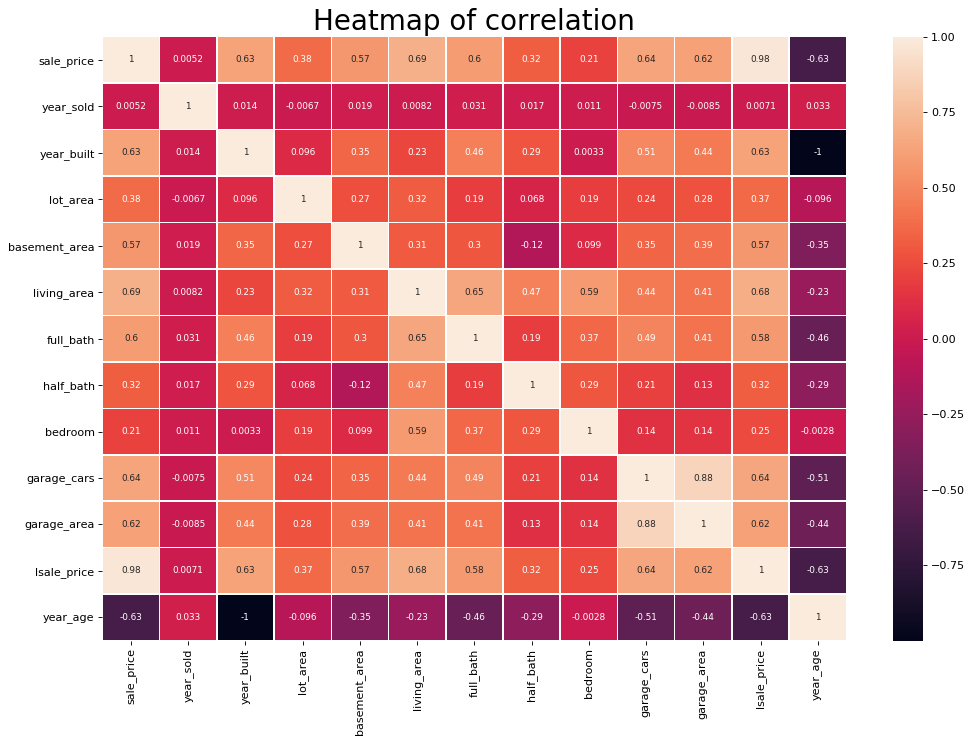

In [37]:
corr_matrix = sales.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)]= False

f, ax = plt.subplots(figsize=(15, 10))
plt.title('Heatmap of correlation',fontsize=25)
sns.heatmap(sales.corr(), linewidths=0.5, vmax=1,
            linecolor='w', annot=True, annot_kws={"size":8}, mask=mask)

# https://www.kdnuggets.com/2019/07/annotated-heatmaps-correlation-matrix.html
# I modified from this website.

From above heatmap, we can see the correlation. When the absolute correlation values are close to zero, it means there is no relationship between two variables. But we are focusing on how the relationship between `sale_price` and the others.

From the heatmap, we can see the `bedroom` has small correlaiton with `sale_price`. But it does not make sense for me. In common sense, if we have more bedrooms it would be more expensive. So I want to check the relationship about `bathroom_per_bedroom` by `bathroom`/`bedroom`. For example, if we have 6 bedrooms but only have 1 bathroom, only one bathroom would be busy everyday and everyone does not want that kind of house. So, we expect that the sale_price for that case would be low. However, we have two kind of bathrooms which are `full_bath` and `half_bath`. To find the `bathroom_per_bedroom`, just adding `full_bath` and `half_bath`.

In [38]:
sales['bathroom'] = sales.apply(lambda row: row.half_bath + row.full_bath, axis = 1)
sales = sales.assign(
    bathroom_per_bedroom = sales.bathroom / sales.bedroom).replace(
    float("Inf"), float("NaN") # this handles cases where # bedrooms is 0.
)

In [39]:
# sns.scatterplot(x="sale_price", y="bathroom_per_bedroom", data=sales)

In [40]:
sales = sales.dropna()

In [41]:
# to check there are nan values or not.
sales.isnull().values.any()

False

In [42]:
# round the value up to 2 decimal points.
sales['bathroom_per_bedroom'] = round(sales['bathroom_per_bedroom'],2)

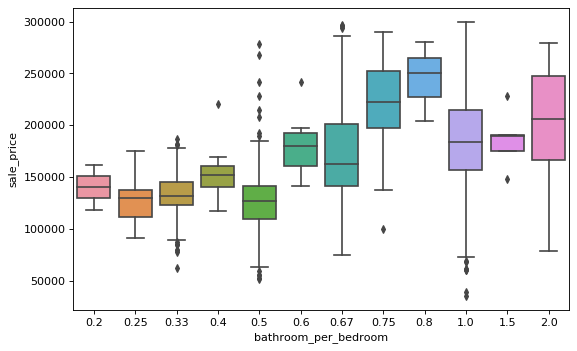

In [43]:
sns.boxplot(x=sales['bathroom_per_bedroom'], y=sales['sale_price'])

In [44]:
# Drop the unrelated points.
sales = sales.drop(sales[(sales['bathroom_per_bedroom']>0.9) 
                         & (sales['sale_price']>500000)].index).reset_index(drop=True)
sales = sales.drop(sales[(sales['bathroom_per_bedroom']<1.1) 
                         & (sales['sale_price']>350000)].index).reset_index(drop=True)
sales = sales.drop(sales[(sales['bathroom_per_bedroom']>1.9) 
                         & (sales['sale_price']<200000)].index).reset_index(drop=True)
sales = sales.drop(sales[(sales['bathroom_per_bedroom']<0.9) 
                         & (sales['sale_price']>300000)].index).reset_index(drop=True)
sales = sales.drop(sales[(sales['bathroom_per_bedroom']==0.5) 
                         & (sales['sale_price']>220000)].index).reset_index(drop=True)

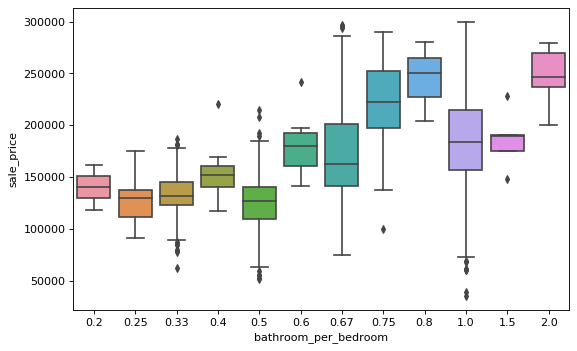

In [45]:
sns.boxplot(x=sales['bathroom_per_bedroom'], y=sales['sale_price'])

In [46]:
# We made new columns called 'year_age' and 'bathroom_per_bedroom'.
# So we do not need to concern about the columns to make those two columns.
sales = sales.drop(['half_bath','full_bath','bedroom','year_sold','year_built','bathroom'], axis=1)

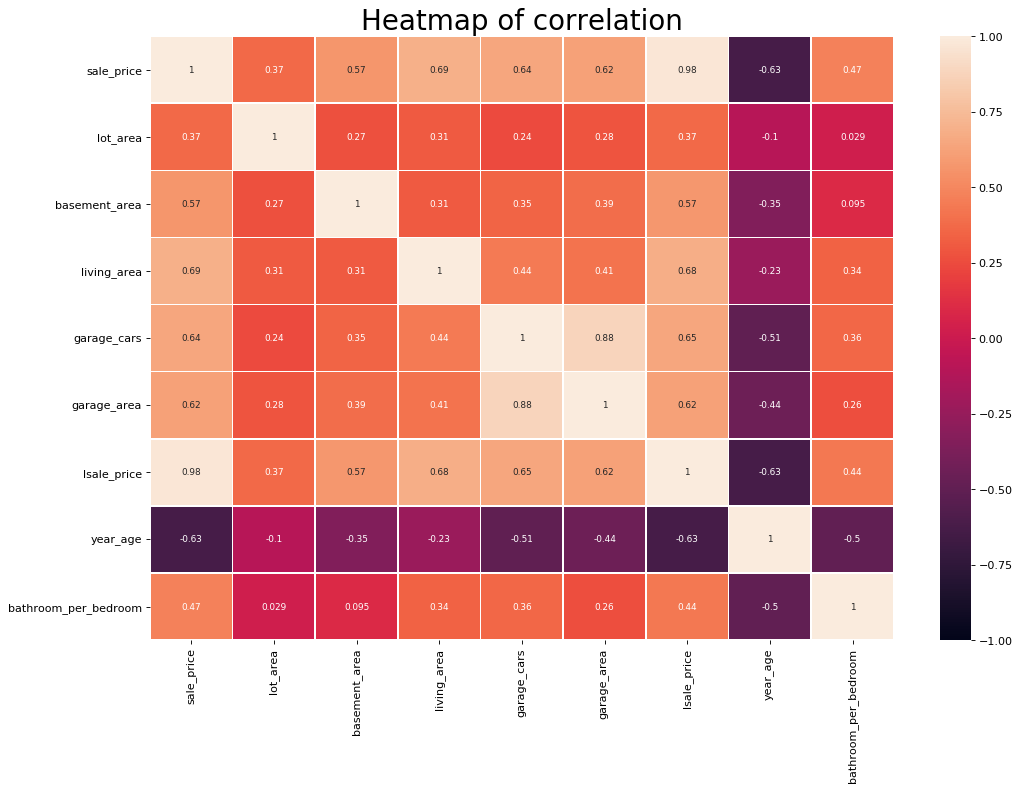

In [47]:
corr_matrix = sales.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)]= False

f, ax = plt.subplots(figsize=(15, 10))
plt.title('Heatmap of correlation',fontsize=25)
sns.heatmap(sales.corr(), linewidths=0.5, vmax=1, vmin=-1,
            linecolor='w', annot=True, annot_kws={"size":8}, mask=mask)

In [48]:
# We have to change the categorical varibles into numbers using one-hot coding.
sales = pd.get_dummies(sales)
sales.head()

,sale_price,lot_area,basement_area,living_area,garage_cars,garage_area,lsale_price,year_age,bathroom_per_bedroom,ac_N,...,neighborhood_nb_1,neighborhood_nb_2,neighborhood_nb_3,neighborhood_nb_4,quality_average,quality_excellent,quality_poor,condition_average,condition_excellent,condition_poor
0,244000,11160,2110,2110,2,522,12.404924,42,1.0,0,...,0,1,0,0,1,0,0,1,0,0
1,189900,13830,928,1629,2,482,12.154253,13,1.0,0,...,0,1,0,0,1,0,0,1,0,0
2,191500,5005,1280,1280,2,506,12.162643,18,1.0,0,...,0,0,0,1,1,0,0,1,0,0
3,236500,5389,1595,1616,2,608,12.373703,15,1.0,0,...,0,0,0,1,1,0,0,1,0,0
4,189000,7500,994,1804,2,442,12.149502,11,1.0,0,...,0,1,0,0,1,0,0,1,0,0


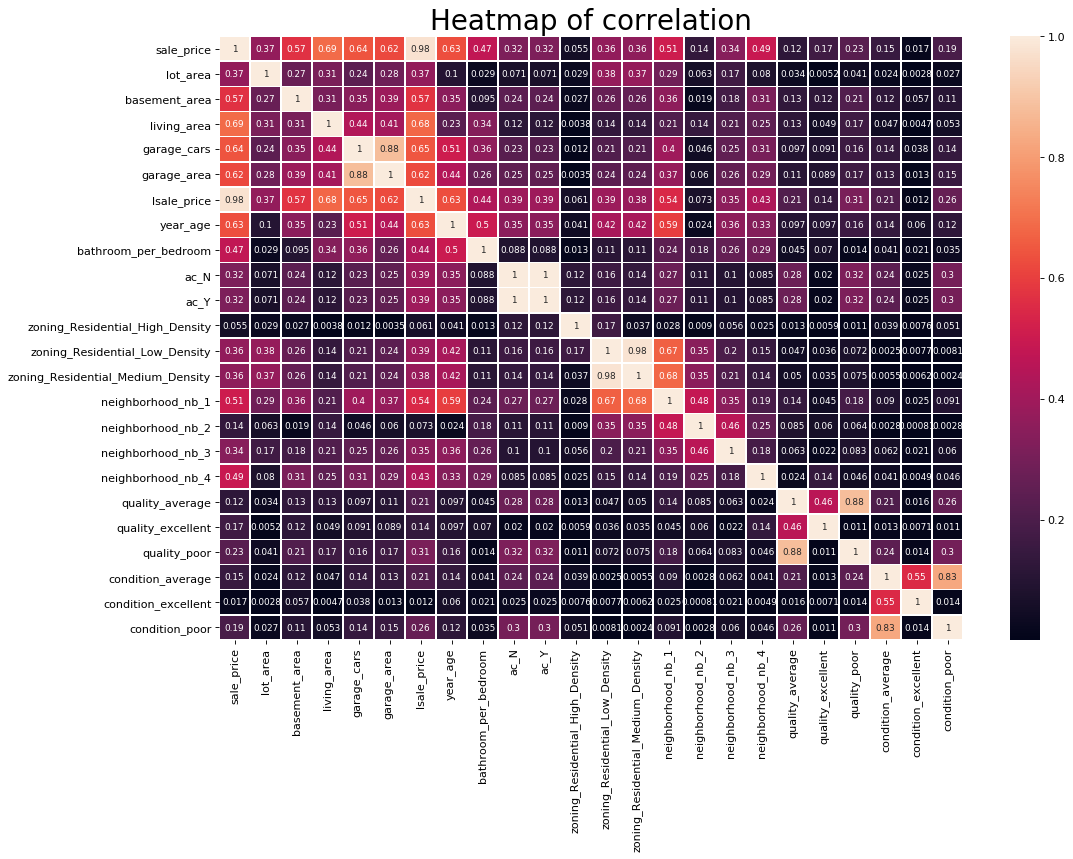

In [49]:
corr_matrix = sales.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)]= False

f, ax = plt.subplots(figsize=(15, 10))
plt.title('Heatmap of correlation',fontsize=25)
sns.heatmap(abs(sales.corr()), linewidths=0.5, vmax=1,
            linecolor='w', annot=True, annot_kws={"size":8}, mask=mask)

In this heatmap, we can see the correlation of all the columns getting from one-hot coding. To choose the related columns more easily, I take the absolute value. I will drop the data which correlations are lower than 0.20. 

In [50]:
# Take the columns into new 'sales1' data.
sales1 = sales[['sale_price', 'lot_area','basement_area','living_area','garage_area','garage_cars',
               'lsale_price','bathroom_per_bedroom','ac_N','ac_Y','zoning_Residential_Low_Density',
               'zoning_Residential_Medium_Density','neighborhood_nb_1','neighborhood_nb_3',
               'neighborhood_nb_4','quality_poor','year_age']]

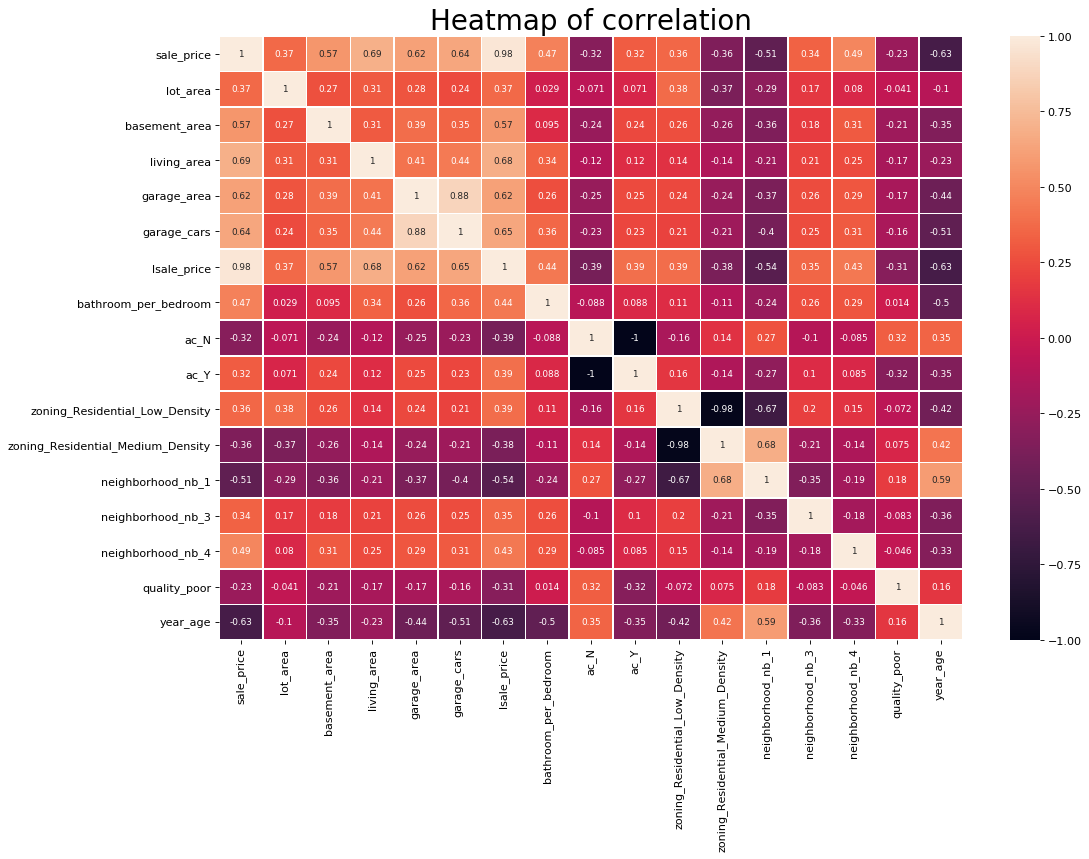

In [51]:
# Let's see the correlation about chosen features.
corr_matrix = sales1.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)]= False

f, ax = plt.subplots(figsize=(15, 10))
plt.title('Heatmap of correlation',fontsize=25)
sns.heatmap(sales1.corr(), linewidths=0.5, vmax=1,
            linecolor='w', annot=True, annot_kws={"size":8}, mask=mask)

## 3. Model Fitting and Tuning

*In this section you should detail your choice of model and describe the process used to refine and fit that model. You are strongly encouraged to explore many different modeling methods (e.g. linear regression, regression trees, lasso, etc.) but you should not include a detailed narrative of all of these attempts. At most this section should mention the methods explored and why they were rejected - most of your effort should go into describing the model you are using.*

*For example if you considered a linear regression model, a classification tree, and a lasso model and ultimately settled on the linear regression approach then you should mention that other two approaches were tried but do not include any of the code or any in depth discussion of these models beyond why they were rejected. Additional code for these models shoulds be included in a supplemental materials notebook or script. What this section should then detail is the development of the linear regression model in terms of features used, interactions considered, and any additional tuning and validation which ultimately led to your final model.*

In [52]:
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LinearRegression

In [53]:
# From 'workshop 5', I modified 'get_coefs' and 'model_fit' functions.
def get_coefs(m):
    """Returns the model coefficients from a Scikit-learn model object as an array,
    includes the intercept if available.
    """
    
    if m.intercept_ is None:
        return m.coef_
    
    return np.concatenate([[m.intercept_], m.coef_])

def model_fit(m, X, y, plot = False):
    """Returns the root mean squared error of a fitted model based on provided X and y values.
    
    Args:
        m: sklearn model object
        X: model matrix to use for prediction
        y: outcome vector to use to calculating rmse and residuals
        plot: boolean value, should fit plots be shown 
    """
    
    y_hat = m.predict(X)
    rmse = mean_squared_error(np.exp(y), np.exp(y_hat), squared=False)
    # We used 'lsale_price' which takes the log on 'sale_price'.
    # To get the value back, we need to take np.exp().
    
    res = pd.DataFrame(
        data = {'y': np.exp(y), 'y_hat': np.exp(y_hat), 'resid': np.exp(y)-np.exp(y_hat)}
    )
    
    if plot:
        plt.figure(figsize=(12, 6))
        
        plt.subplot(121)
        sns.lineplot(x='x', y='y', color="grey", data =  pd.DataFrame(data={'x': [min(np.exp(y)),max(np.exp(y))], 'y': [min(np.exp(y)),max(np.exp(y))]}))
        sns.scatterplot(x='y', y='y_hat', data=res).set_title("Fit plot")
        
        plt.subplot(122)
        sns.scatterplot(x='y', y='resid', data=res).set_title("Residual plot")
        
        plt.subplots_adjust(left=0.0)
        
        plt.suptitle("Model rmse = " + str(round(rmse, 4)), fontsize=16)
        plt.show()
    
    return rmse

In [54]:
def get_test(data):
    """
    Input : data
    Output : test data from Xt and yt
    I did same steps with my training data to get the Xt and yt from unknown data.
    """
    
    # about lot_area
    data = data.drop(data[(data['lot_area']>75000) 
                         & (data['sale_price']<400000)].index).reset_index(drop=True)
    data = data.drop(data[(data['lot_area']<41000) 
                         & (data['sale_price']>350000)].index).reset_index(drop=True)
    data = data.drop(data[(data['lot_area']>30000) 
                         & (data['sale_price']<200000)].index).reset_index(drop=True)
    
    # about basement_area
    data = data.drop(data[(data['basement_area']>1500) 
                         & (data['sale_price']>550000)].index).reset_index(drop=True)
    data = data.drop(data[(data['basement_area']<100) 
                         & (data['sale_price']>150000)].index).reset_index(drop=True)
    
    # about living_area
    data = data.drop(data[(data['living_area']>2000) 
                         & (data['sale_price']>500000)].index).reset_index(drop=True)
    
    # about year_built
    data = data.drop(data[(data['year_built']<1950) 
                         & (data['sale_price']>290000)].index).reset_index(drop=True)
    sales = data.drop(data[(data['year_built']<1900) 
                         & (data['sale_price']>150000)].index).reset_index(drop=True)
    sales = data.drop(data[(data['sale_price']>350000)].index).reset_index(drop=True)
    
    # about year_age (making new column)
    data['year_age'] = data.apply(lambda row: row.year_sold - row.year_built, axis = 1)
    data = data.drop(data[(data['year_age']>50) 
                         & (data['sale_price']>200000)].index).reset_index(drop=True)
    data = data.drop(data[(data['sale_price']>300000)].index).reset_index(drop=True)

    # about bathroom_per_bedroom (making new column)
    data['bathroom'] = data.apply(lambda row: row.half_bath + row.full_bath, axis = 1)
    data = data.assign(
    bathroom_per_bedroom = data.bathroom / data.bedroom).replace(
    float("Inf"), float("NaN") # this handles cases where # bedrooms is 0.
    )
    data = data.dropna()
    data['bathroom_per_bedroom'] = round(data['bathroom_per_bedroom'],2)
    
    # making new column 'lsale_price'
    data['lsale_price'] = np.log(data['sale_price'])
    
    # about neighborhood
    data['neighborhood'] = data['neighborhood'].replace(['nb_02','nb_09','nb_06','nb_13','nb_23','nb_01'], 'nb_1')
    data['neighborhood'] = data['neighborhood'].replace(['nb_11','nb_17','nb_18','nb_07','nb_20','nb_22'], 'nb_2')
    data['neighborhood'] = data['neighborhood'].replace(['nb_24','nb_04','nb_08','nb_14','nb_05','nb_16'], 'nb_3')
    data['neighborhood'] = data['neighborhood'].replace(['nb_21','nb_15','nb_10','nb_12','nb_03','nb_19'], 'nb_4')
    
    # about quality
    data['quality'] = data['quality'].replace('good', 'average')
    data['quality'] = data['quality'].replace('fair', 'poor')
    
    # about condition
    data['condition'] = data['condition'].replace('fair', 'poor')
    data['condition'] = data['condition'].replace('good', 'average')
    
    data = data.drop(data[(data['bathroom_per_bedroom']>0.9) 
                         & (data['sale_price']>500000)].index).reset_index(drop=True)
    data = data.drop(data[(data['bathroom_per_bedroom']<1.1) 
                         & (data['sale_price']>350000)].index).reset_index(drop=True)
    data = data.drop(data[(data['bathroom_per_bedroom']>1.9) 
                         & (data['sale_price']<200000)].index).reset_index(drop=True)
    data = data.drop(data[(data['bathroom_per_bedroom']<0.9) 
                         & (data['sale_price']>300000)].index).reset_index(drop=True)
    data = data.drop(data[(data['bathroom_per_bedroom']==0.5) 
                         & (data['sale_price']>220000)].index).reset_index(drop=True)
    
    data = pd.get_dummies(data)
    
    data1 = data[['sale_price', 'lot_area','basement_area','living_area','garage_area','garage_cars',
               'lsale_price','bathroom_per_bedroom','ac_N','ac_Y','zoning_Residential_Low_Density',
               'zoning_Residential_Medium_Density','neighborhood_nb_1','neighborhood_nb_3',
               'neighborhood_nb_4','quality_poor','year_age']]
    
    yt = data1.lsale_price
    Xt = data1.drop(['sale_price','lsale_price'], axis=1)
    
    return Xt, yt

#  Linear Regression

In [55]:
X = sales1.drop(['sale_price','lsale_price'], axis=1)
y = sales1.lsale_price

# In my data, I have 'sale_price' and 'lsale_price' columns and I do not need to use 'sale_price' here
# since 'lsale_price' looks like more normal distribution(i.e. not skewed).
# Also we want to find the 'sale_price' but we used 'lsale_price' not 'sale_price'.
# Therefore, y should be 'lsale_price'

In [56]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(X, y)

In [57]:
# to get the Xt, yt from test data, using 'get_test' function.
Xt, yt = get_test(sales_test)

In [58]:
print('the shape of X is {} and Xt is {}'.format(X.shape, Xt.shape))

the shape of X is (1438, 15) and Xt is (312, 15)


I take 15 different features.

In [59]:
get_coefs(lm)

array([ 1.10455933e+01,  5.48730192e-06,  1.44823479e-04,  2.82932307e-04,
        1.23273995e-04,  3.85885113e-02,  6.76673363e-02, -7.46597438e-02,
        7.46597438e-02,  1.53062788e-01,  1.30365856e-01, -5.41356227e-02,
        5.92593755e-02,  1.46283373e-01, -2.03783890e-01, -2.08375714e-03])

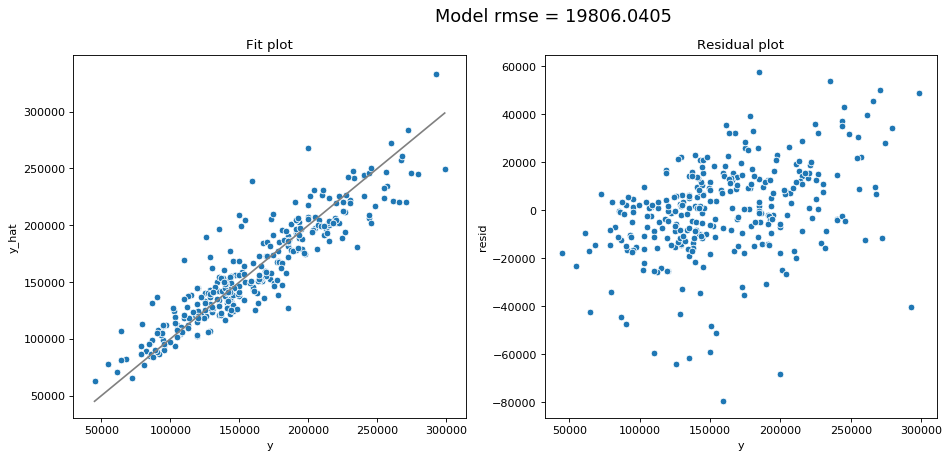

19806.04049021371

In [60]:
model_fit(lm, Xt, yt, plot=True)

In [61]:
model_fit(lm, X, y)

19703.732534095718

I expected that the rmse of test data is worse than training data since most of time we get bigger rmse of test data. And my test data's rmse is worse than training. (i.e. test rmse > training rmse)

###  Scaled Linear Regression

Before fitting the Ridge and Lasso linear model, we need to scale the X and Xt data due to scaling features what we use.

In [62]:
from sklearn.preprocessing import StandardScaler

S = StandardScaler().fit(X)

X_scaled = S.transform(X)
Xt_scaled = S.transform(Xt)

In [63]:
lm_scaled = LinearRegression().fit(X_scaled, y)

In [64]:
get_coefs(lm_scaled)

array([11.94024393,  0.02296372,  0.05354253,  0.11958506,  0.02269826,
        0.0266523 ,  0.01854681, -0.01854502,  0.01854502,  0.05943132,
        0.04994551, -0.02400939,  0.02567195,  0.04223715, -0.0286461 ,
       -0.05858507])

In [65]:
model_fit(lm_scaled, Xt_scaled, yt, plot=False)

19806.040490213778

In [66]:
model_fit(lm_scaled, X_scaled, y, plot=False)

19703.732534095776

## 4. Discussion


*In this section you should provide a general overview of your final model and its performance. You should discuss what the implications of your model are in terms of the included features, predictive performance, and anything else you think is relevant. The target audience for this should be someone who is familiar with the basics of real estate and mathematics but not necessarily someone who has taken a postgraduate statistical modeling course. Your goal should be to convince this audience that your model is both accurate and useful.*

(17.5, -0.5)

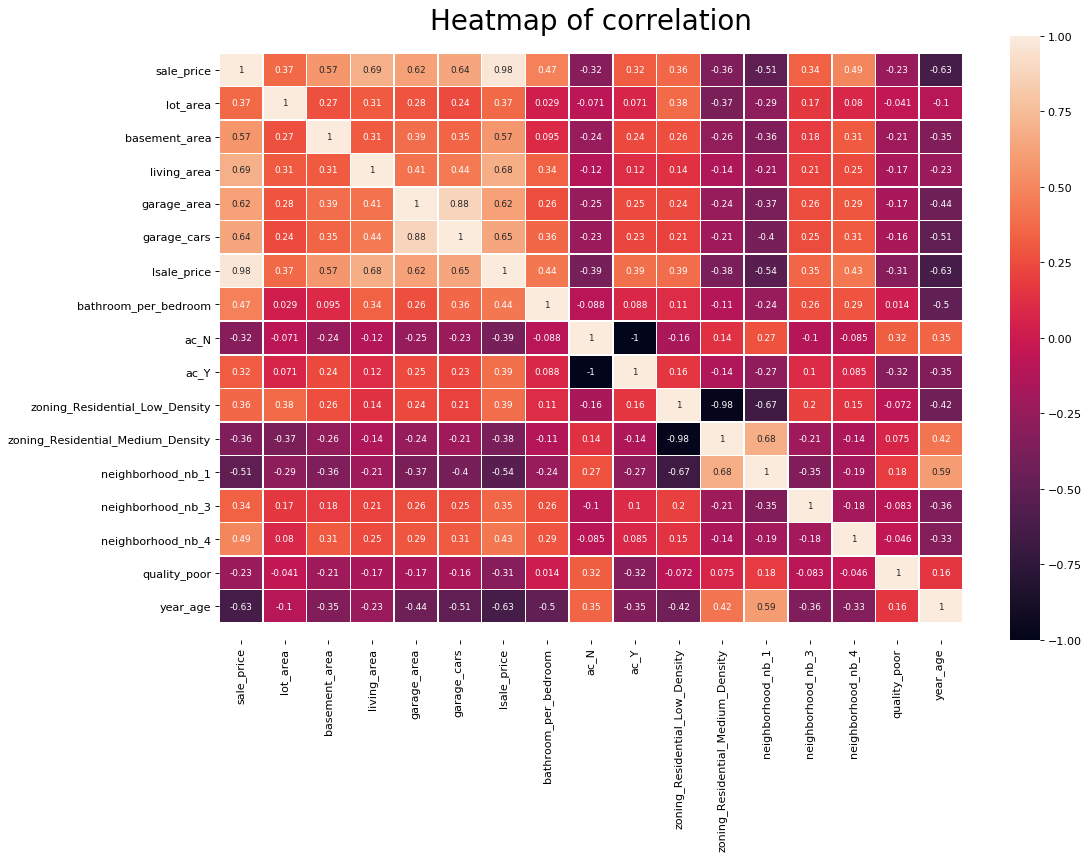

In [71]:
corr_matrix = sales1.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)]= False

f, ax = plt.subplots(figsize=(15, 10))
plt.title('Heatmap of correlation',fontsize=25)
sns.heatmap(sales1.corr(), linewidths=0.5, vmax=1,
            linecolor='w', annot=True, annot_kws={"size":8}, mask=mask)


  I tried 3 models which are 'Linear regression', 'Ridge regression' and 'Lasso regression'. When I get those three rmse values, I found that the rmse of Ridge regression and Linear regression are relly similar.

  Ridge regression is the one of the well-known techniques for regularisation. To give short brief about 'regularisation', it is a method to get substantial improvements in the performance of the model by shrinking the estimated weights. Ridge regression has penalty function that penalizes for large weight values with tuning parameter (in this task we called it as an 'alpha' for tuning parameter). This tuning parameter controls the impact of the penalisation. Therefore selecting alpha is critical and we also need to find the suitable alpha as tuning parameter. The rmse would be changed which value I have used for alpha.
  
  
  In that reason to predict the `sale_price`, I choose the linear model. In linear regression model, we assume a simple linear form. There are regression weights and residual error between the linear predictions and the true output in linear regression.


  From heatmap which represents the correlations, we can easily find the correlation between each feature. There are two types of correlations, which are positive and negative relationship. If the sign of correlation is positive, it means that the feature is getting high then the value what we want to expect is also getting high and in this case we want to predict the `sale_price`. For example, `living_area` has the biggest correlation with `sale_price`. That means that if we have bigger living area, the sale price might be increase. On the other hand, `year_age` has the negative correlation amount of -0.63. If we buy older age of house, the sale price might decrease.

In [68]:
# To see more clearly, I make a table using dataframe
#  - to express 'positive features' and corresponding correlation values.

cor_data1 = {'Positive feature':['living_area', 'garage_cars', 'garage_area', 'basement_area',
                          'neighborhood_nb_4', 'bathroom_per_bedroom','lot_area',
                           'zoning_Residential_Low_Density', 'neighborhood_nb_3', 'ac_Y'],
               'correlation value':[0.69,0.64,0.62,0.57,0.49,0.47,0.37,0.36,0.34,0.32]}
df1 = pd.DataFrame(cor_data1, index = ['1','2','3','4','5','6','7','8','9','10'])
df1

,Positive feature,correlation value
1,living_area,0.69
2,garage_cars,0.64
3,garage_area,0.62
4,basement_area,0.57
5,neighborhood_nb_4,0.49
6,bathroom_per_bedroom,0.47
7,lot_area,0.37
8,zoning_Residential_Low_Density,0.36
9,neighborhood_nb_3,0.34
10,ac_Y,0.32


  From above table, we can see easily which features affect the `sale_price`. I made that table by ordering higher relationship on `sale_price`. 
  
  As already mentioned above, `living_area` is the biggest impact on `sale_price`. In addition, the more capacity of cars (`garage_cars`) and more enough garage space(`garage_area`) there are, the higher `sale_price` it might be. 
  
  The 5th and 9th of 'positive feature' are about neighborhood. I combined the 24 neighborhoods into 4 neighborhoods by similar mean value of sale_price. `neighborhood_nb_4` is the most expensive region in this city. So if someone wants to find a house in `nb_4` region, it might be expensive than other regions. Also `nb_3` region affect on `sale_price` in positive way. However it does not affect on it as much as 'nb_4'. 
  
  When we have bigger `lot_area`, the price might increase. The 8th of 'positive feature' is about zoning. It is 'residential low density' and it actually means that it is not crowded in that zone. An example of 'residential high density' is apartment and in that zone people live with others. Back to 'residential low density' if person wants to find a house in `Residential_Low_Density` then `sale_price` might increase. Similarly, when we have air conditioning (`ac_Y`) then `sale_price` might increase.

In [69]:
# similarly with cor_data1 ('positive feature')

cor_data2 = {'Negative feature':['year_age', 'neighborhood_nb_1', 'zoning_Residential_Medium_Density',
                         'ac_N', 'quality_poor'],
            'correlation value':[-0.63, -0.51, -0.36, -0.32, -0.23]}
df2 = pd.DataFrame(cor_data2, index = ['1','2','3','4','5'])
df2

,Negative feature,correlation value
1,year_age,-0.63
2,neighborhood_nb_1,-0.51
3,zoning_Residential_Medium_Density,-0.36
4,ac_N,-0.32
5,quality_poor,-0.23


  Similarly with positive features, we can see easily which features have negative correlation. `year_age` is that subtracting `year_sold` to `year_built` and the literal meaning is how many years it is used. Therefore the more year used, the price might decrease. For example, comparing that a house is used for 10 years and the other is 2 years. In this case, we expect that 10 years house might have lower sale_price than 2 years. But we cannot not say it should be cause we need to consider the other features.
  
  In positive features, `nb_4` and `nb_3` have positive correlation with `sale_price`. However `neighborhood_nb_1` has negative correlation. The reason is that `neighborhood_nb_1` is the cheapest region in this city so when we live or find a house in 'nb_1' we expect that the sale_price might be low.
  
  In addition, `zoning_Residential_Low_Density` has positive effect on `sale_price`, but `zoning_Residential_Medium_Density` has negative correlation. That makes sense because if the population is more dense, the quality of life could be worse (not necessarily but it could be).
  
  Of course having air conditioning would affect the sale_price. If there has air conditioning (`ac_Y`), the `sale_price` tends to or might increase. However if there has no air conditioning (`ac_N`), the `sale_price` tends to or might decrease. Interestingly, the absoulte the correlation value of `ac_Y` and `ac_N` is same but they have different types of impact like positive and negative. And this also makes sense.
  
  Lastly, `quality_poor`. We did not mention about other qualities like 'quality_average' or 'quality_excellent'. The reason is that it does not affect the `sale_price`. Among quality features, `quality_poor` affects on price in negative way. If you sell the low quality of house, you might not expect to sell in high price. Also if you buy the low quality of house, you might expect to buy in high price.

In [70]:
y_hat = lm.predict(Xt)
new_pred = pd.DataFrame(np.exp(y_hat), columns=['y_hat'])
new_pred['y_hat'].describe()

count       312.000000
mean     159682.283685
std       45459.335210
min       62911.972592
25%      127186.493573
50%      151246.308583
75%      195299.677333
max      332693.802342
Name: y_hat, dtype: float64

I predict the mean of `sale_price` with given `test_data`. Our mean of training sale_price is 174600.288510 and when I predict test `sale_price` with linear regression model, the mean value is 159682.283685. 

We can see how many data I use, the quantiles, minimun and maximum value, too.

## 5. Model Validation

*We have provided a third csv file called `sales_holdout.csv` which we will be using for assessing the predictive performance of your model. The file provided with the assignment contains **identical** data to `sales_test.csv`, however after you turn in your notebook we will be replacing this file with the true holdout data (350 additional house sales not included in the train or test set) and rerunning your notebook.*

*The objective of this is two-fold, the first is to ensure that your modeling code is reproducible and everything can be rerun and "identical" results can be obtained. And second, to obtain a reliable estimate of your final model's predictive performance, which will be compared across all of the projects in the course.*

*You should include a brief write up in the section detailing the performance of your model, in particular you should discuss the implications of this modeling uncertainty in the context of predicting house prices. For example, buyers and sellers are likely to care if the prediction is off by `$20,000` but are less likely to care if it is off by `$500`.*

In [45]:
sales_holdout = pd.read_csv("sales_holdout.csv")

# Adjust this code as necessary to preprocess the holdout data
X_holdout, y_holdout = get_test(sales_holdout)

#X_holdout = sales_holdout.drop('sale_price', axis=1)
#y_holdout = sales_holdout.sale_price

In [46]:
# This is a placeholder model so the subsequent cell runs
# DELETE this cell once `final_model` or equivalent is defined
# in Section 3.

from sklearn.linear_model import LinearRegression

X_holdout = X_holdout.select_dtypes(exclude='object')
final_model = LinearRegression().fit(X_holdout, y_holdout)

In [47]:
# Calculate the root mean squared error for your model
# 
# Change the name of `final_model` to reflect the name of your fitted model object
#
# Alternative metrics are acceptable here but require 
# justification in your write up

np.sqrt( sklearn.metrics.mean_squared_error(y_holdout, final_model.predict(X_holdout)) )

30169.586918609933